In [1]:
import os
import sys
from pathlib import Path

# setting proper working directory
PROJECT_DIRECTORY = Path(os.path.abspath('')).resolve().parents[0]
sys.path.extend([str(PROJECT_DIRECTORY)])

print(f'Python {sys.version} on {sys.platform}')
print('Project directory: ', PROJECT_DIRECTORY)

Python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)] on win32
Project directory:  C:\Users\s8347434\Documents\RecBole-GNN


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import gaussian_kde

In [ ]:
tu_dd_blue = (0 / 255, 48 / 255,93 / 255)
bu_green1 = (138 / 255, 203 / 255,193 / 255)
bu_green2 = (0 / 255, 172 / 255,169 / 255)
bu_green3 = (0 / 255, 131 / 255,141 / 255)
ing_blue1 = (132 / 255,207 / 255,237 / 255)
ing_blue2 = (0 / 255,161 / 255,217 / 255)
ing_blue3 = (0 / 255,119 / 255,174 / 255)
ing_blue4 = (0 / 255,105 / 255,180/ 255)

In [102]:
dataset_df = pd.read_csv("../eval/log/Dataset/dataset_eval.csv", sep="\t")

In [103]:
dataset_df['sparsity'] = 1 - dataset_df['density']

In [104]:
# Loop through columns that start with "average_clustering"
for col in dataset_df.columns:
    if col.startswith('average_clustering') or col.startswith('density'):
        # Calculate log10 and create a new column with "_log" suffix
        dataset_df[f"{col}_log"] = np.log10(dataset_df[col])

In [92]:
"""def plot_column_distribution(df, column, dataset_range, value_name=None, title_dist=None, title_hist=None, save_fig = False):

    Plots the distribution of a column across datasets.

    Args:
        df (pd.DataFrame): The DataFrame containing dataset characteristics.
        column (str): The column to plot.

    # Prepare data
    if dataset_range:
        lower_bound, upper_bound = dataset_range
        datasets = df[(df['dataset'] >= lower_bound) & (df['dataset'] <= upper_bound)]['dataset']
    else:
        datasets = df['dataset']
    if value_name is None: value_name = column
        
    values = df[column]
    
    tu_dd_blue = (0 / 255, 48 / 255,93 / 255)
    bu_green1 = (138 / 255, 203 / 255,193 / 255)
    bu_green2 = (0 / 255, 172 / 255,169 / 255)
    bu_green3 = (0 / 255, 131 / 255,141 / 255)
    ing_blue1 = (132 / 255,207 / 255,237 / 255)
    ing_blue2 = (0 / 255,161 / 255,217 / 255)
    ing_blue3 = (0 / 255,119 / 255,174 / 255)
    ing_blue4 = (0 / 255,105 / 255,180/ 255)
    
    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1], 'hspace': 1})
    fig.subplots_adjust(left=0.15, right=1, top=0.95, bottom=0.15)  # Fine-tune these values

    # Set global font size and padding
    plt.rc('font', size=30)            
    plt.rc('axes', titlesize=30, labelsize=30)
    plt.rc('axes', labelpad=30) 
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=18) 
    plt.rc('legend', fontsize=20)
    
    if column == "sparsity":
        # Determine granular y-axis limits
        values = (1-values) * 100  # Convert to percentages
        y_min = values.min() - 0.01  # Add a small buffer below min value
        y_max = values.max() + 0.01  # Add a small buffer above max value
        y_ticks = np.linspace(y_min, y_max, num=10)  # Granular ticks
    else:
        y_min = values.min() * 0.95
        y_max = values.max() * 1.05
        y_ticks = None
    
    if dataset_range and dataset_range[1] >= 176:
        xticks = [1] + list(range(10, 176, 10)) + [176]
        plt.xticks(xticks)  # Adjust step size (e.g., 10) for better label visibility
    
    # Bar plot of values
    ax[0].bar(datasets, values, color=ing_blue4, alpha=0.8)
    if column == 'sparsity':
        ax[0].set_ylim(y_min, y_max)
        ax[0].set_yticks(y_ticks)
    ax[0].set_ylabel(value_name)
    ax[0].set_xlabel("Datasets")
    if title_dist is None: title_dist = f"Value of {column} per Dataset"
    #ax[0].set_title(title_dist)
    ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)
    
    # Show only every 10th label
    ax[0].set_xticks(range(0, len(datasets), 10))
    ax[0].set_xticklabels(datasets[::10])

    # Histogram to show the distribution
    ax[1].hist(values, bins=30, color=bu_green1, alpha=0.8, edgecolor='black', density=True)
    if title_hist is None: title_hist = f"Distribution of {value_name}"
    #ax[1].set_title(title_hist)
    ax[1].set_xlabel(value_name)
    ax[1].set_ylabel("Frequency")
    ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)
    
    # Overlay density curve
    kde = gaussian_kde(values)
    x_vals = np.linspace(values.min(), values.max(), 400)
    density_vals = kde(x_vals)
    ax[1].plot(x_vals, density_vals, color=tu_dd_blue, lw=2, label='Density')
    ax[1].legend()
    
    if save_fig: plt.savefig(f"../asset/plots/dataset_dist_{column}.png", dpi=300, transparent=True)
    # Adjust layout and show
    #fig.tight_layout(pad=2.0)  # Adjust the `rect` for finer control

    plt.show()"""

In [114]:
def plot_column_distribution_seaborn(df, column, dataset_range=None, value_name=None, title_hist=True, save_fig=False):
    """
    Plots the histogram of a column using Seaborn.

    Args:
        df (pd.DataFrame): The DataFrame containing dataset characteristics.
        column (str): The column to plot.
        dataset_range (tuple): Optional range for filtering datasets (lower_bound, upper_bound).
        value_name (str): Optional label for the x-axis.
        title_hist (str): Optional title for the histogram.
        save_fig (bool): Whether to save the figure.
    """
    # Prepare data
    if dataset_range:
        lower_bound, upper_bound = dataset_range
        values = df[(df['dataset'] >= lower_bound) & (df['dataset'] <= upper_bound)][column]
    else:
        values = df[column]

    if value_name is None:
        value_name = column
        
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    sns.histplot(values, bins=30, stat='count', kde=False, color=tu_dd_blue, alpha=0.8)

    # Customize title and labels
    if title_hist:
        title_hist = f"Distribution of {value_name}"
        plt.title(title_hist, fontsize=20, pad=15)
    plt.xlabel(value_name, fontsize=25, labelpad=10)
    plt.ylabel("Frequency", fontsize=25, labelpad=10)
    
    # Customize ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Save figure if required
    if save_fig:
        plt.savefig(f"../asset/plots/dataset_hist_{column}.png", dpi=300, transparent=True)

    plt.show(False)

In [87]:
#print(dataset_df.keys())

Index(['dataset', 'inter_num', 'density', 'connected', 'user_num', 'item_num',
       'user_mean', 'item_mean', 'user_median', 'item_median', 'user_max',
       'item_max', 'user_min', 'item_min', 'sparsity_log', 'space_size',
       'space_size_log', 'shape', 'shape_log', 'gini_user', 'gini_item',
       'average_degree', 'average_degree_user', 'average_degree_item',
       'average_degree_user_log', 'average_degree_item_log',
       'degree_assort_user', 'degree_assort_item',
       'average_clustering_coef_dot', 'average_clustering_coef_dot_user',
       'average_clustering_coef_dot_item', 'average_clustering_coef_min',
       'average_clustering_coef_min_user', 'average_clustering_coef_min_item',
       'average_clustering_coef_max', 'average_clustering_coef_max_user',
       'average_clustering_coef_max_item', 'sparsity', 'density_log',
       'average_clustering_coef_dot_log',
       'average_clustering_coef_dot_user_log',
       'average_clustering_coef_dot_item_log',
       'av

In [116]:
# Example usage: Plot for 'user_num'
plot_dict = [['inter_num','\\# interactions'],
             ['user_num','\\# users'],
             ['item_num','\\# items'],
             ['sparsity','Sparsity'],
             ['shape','Shape'],
             ['space_size','SpaceSize'],
             ['gini_user','Gini_U'],
             ['gini_item','Gini_I'],
             ['average_degree','AvgDeg'],
             ['average_degree_user','AvgDeg_U'],
             ['average_degree_item','AvgDeg_I'],
             ['degree_assort_user','Assort_U'],
             ['degree_assort_item','Assort_I'],
             ['average_clustering_coef_dot','AvgClust'],
             ['average_clustering_coef_dot_user','AvgClust_U'],
             ['average_clustering_coef_dot_item','AvgClust_I']]

#for plot in plot_dict:
#    plot_column_distribution_seaborn(dataset_df, plot[0], dataset_range=[1,176], value_name=f"${plot[1]}$", title_hist=False, save_fig = True)

In [153]:
# Function to plot a correlation matrix heatmap considering only columns that end with '@10'
def plot_correlation_matrix(df, columns, labels, filename="heatmap.png", save_fig=False):
    # Create a new DataFrame for the relevant columns and extracted values
    correlation_data = pd.DataFrame()

    # Extract the '@10' columns and add them to the correlation data
    for col in columns:
        correlation_data[col] = df[col]

    # Compute the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Create a list of colors
    colors = [tu_dd_blue, bu_green1, ing_blue1]

    # Create a custom colormap
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, yticklabels=labels, annot=True, cmap=cmap, center=0, fmt='.3f', linewidths=0.5)

    new_labels = labels

    # Get current x-tick positions and set the labels
    tick_positions = np.arange(len(correlation_matrix.columns)) + 0.4
    # Rotate y-tick labels
    plt.yticks(rotation=0, ha='right', va='center', fontsize=16) 
    plt.xticks(ticks=tick_positions, labels=new_labels, rotation=45, ha='left', va='bottom', fontsize=16)
    plt.tick_params(axis='both', labelsize=16, labelbottom = False, bottom=False, top = False, labeltop=True)

    # Apply padding to shift the x-axis labels
    plt.gca().tick_params(axis='x')  # Adjust this value for the desired padding

    # Move x-axis labels to the top
    plt.gca().xaxis.set_label_position('top')

    # Adjust layout to make space for labels at the top
    plt.tight_layout()

    # Save the figure if requested
    if save_fig:
        plt.savefig(f"../asset/plots/{filename}", dpi=300, transparent=True)

    # Display the plot
    plt.show()

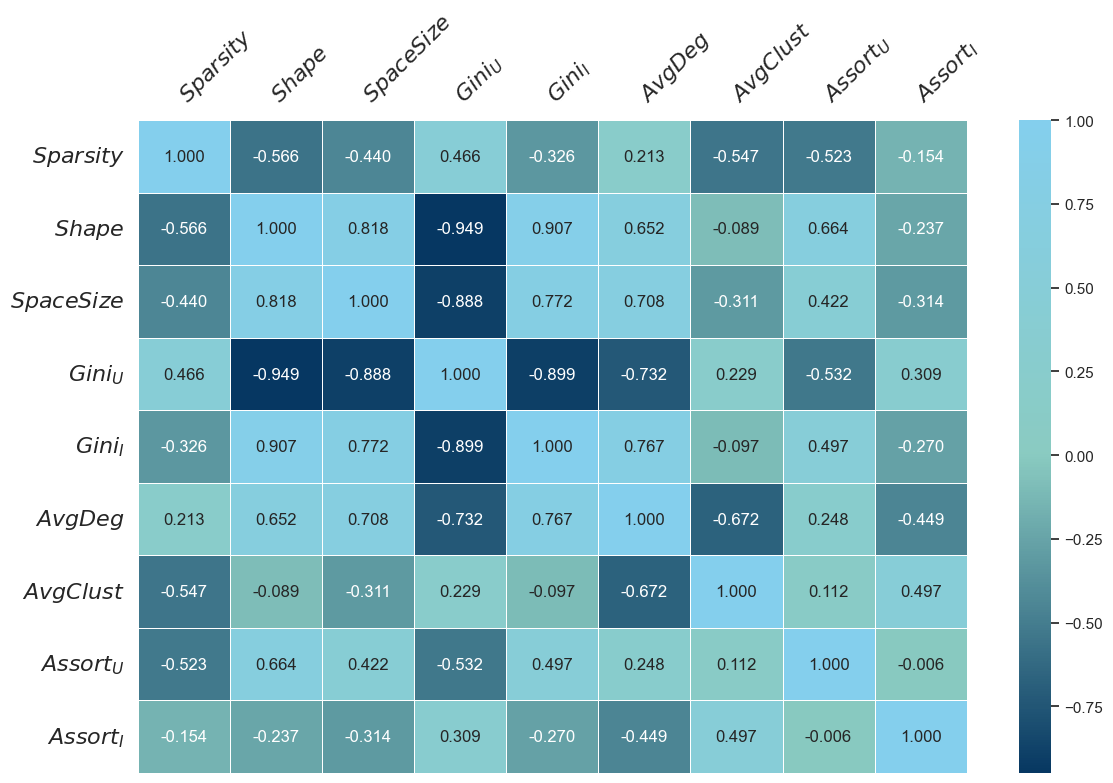

In [154]:
columns = ["sparsity", "shape", "space_size", "gini_user", "gini_item", "average_degree", "average_clustering_coef_dot", "degree_assort_user", "degree_assort_item"]
labels =  ["$Sparsity$", "$Shape$", "$SpaceSize$", "$Gini_U$", "$Gini_I$", "$AvgDeg$", "$AvgClust$", r"$Assort_U$", r"$Assort_I$"]
plot_correlation_matrix(dataset_df, columns, labels, filename = "heatmap_dataset_metrics.png",save_fig=True)

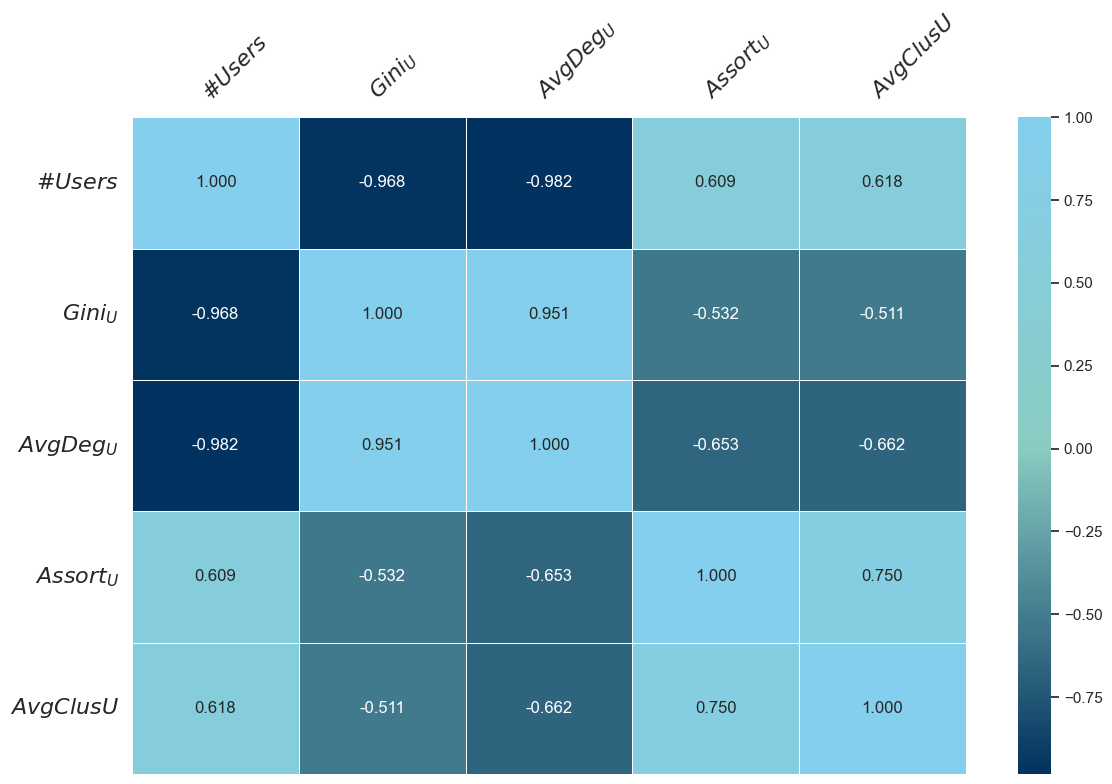

In [156]:
columns = ["user_num", "gini_user", "average_degree_user", "degree_assort_user", "average_clustering_coef_dot_user"]
labels =  ["$\\# Users$", "$Gini_U$", "$AvgDeg_U$", "$Assort_U$", "$AvgClusU$"]
plot_correlation_matrix(dataset_df, columns, labels, filename = "heatmap_dataset_user_metrics_user.png",save_fig=True)

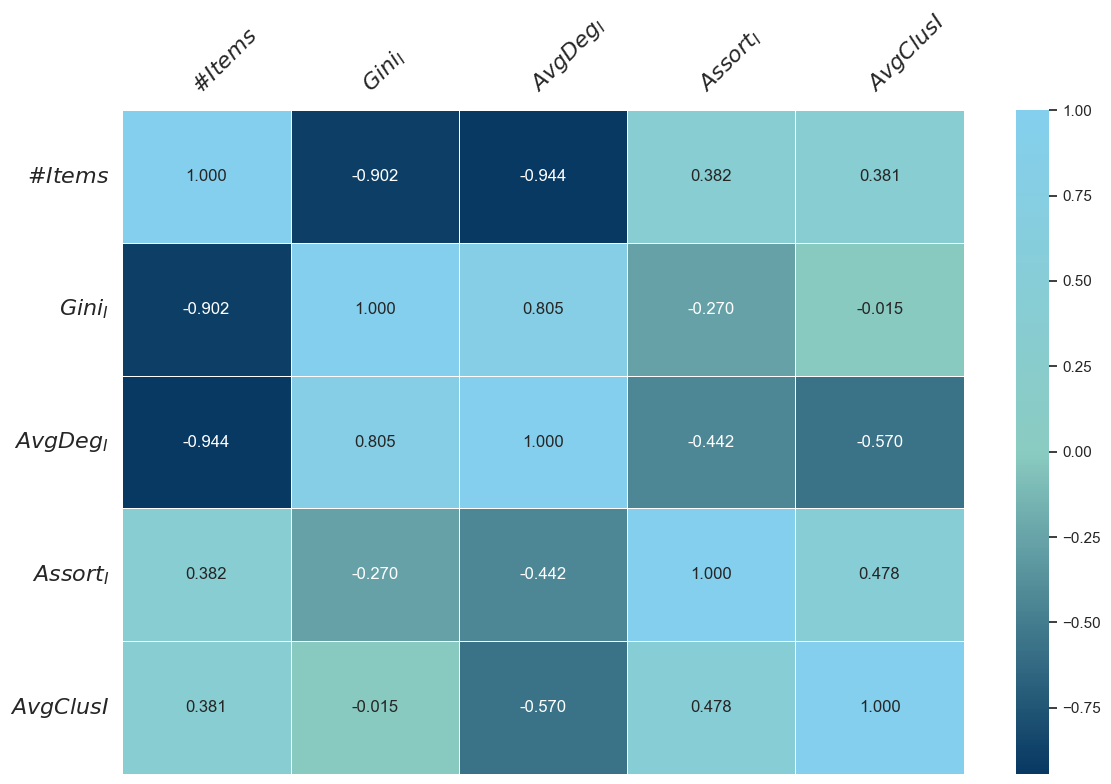

In [157]:
columns = ["item_num", "gini_item", "average_degree_item", "degree_assort_item", "average_clustering_coef_dot_item"]
labels =  ["$\\# Items$", "$Gini_I$", "$AvgDeg_I$", "$Assort_I$", "$AvgClusI$"]
plot_correlation_matrix(dataset_df, columns, labels, filename = "heatmap_dataset_item_metrics_item.png",save_fig=True)